<h4 style="color:#00ffe5 ; text-align:center ; font-size:18px">
Importando bibliotecas 
</h4>

In [7]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

In [8]:
attrition = pd.read_csv('./data/Employee Attrition.csv')

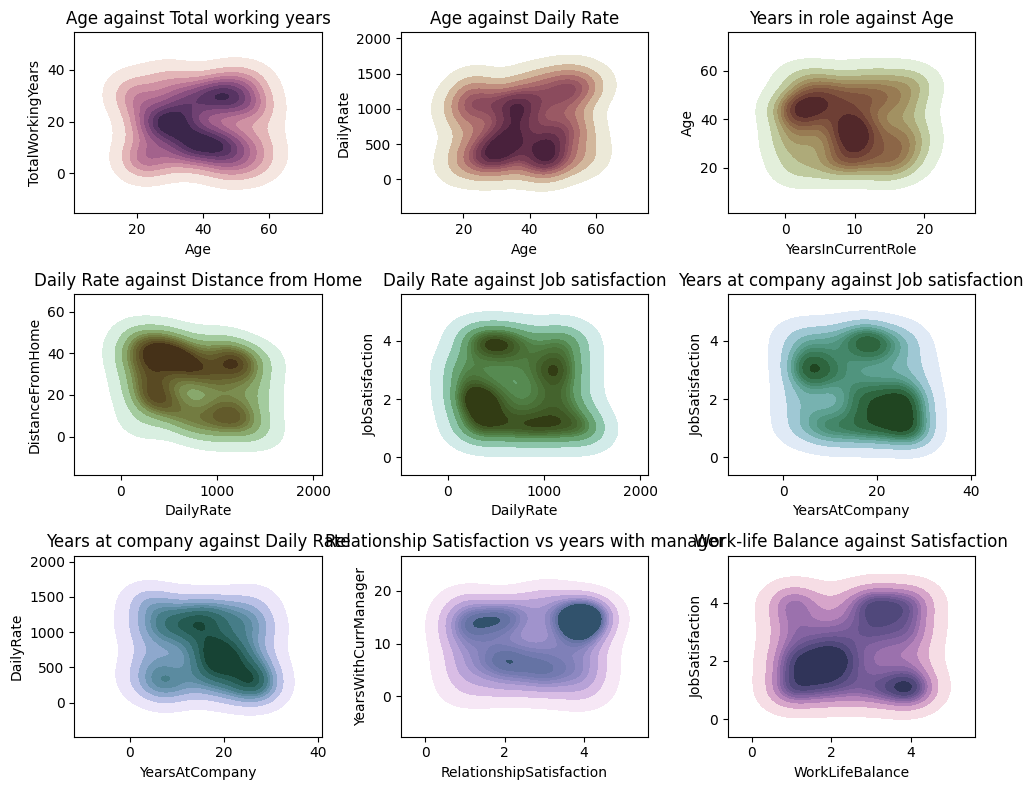

In [12]:
attrition = pd.DataFrame({
    'Age': np.random.randint(18, 60, 100),
    'TotalWorkingYears': np.random.randint(0, 40, 100),
    'DailyRate': np.random.randint(100, 1500, 100),
    'YearsInCurrentRole': np.random.randint(0, 20, 100),
    'DistanceFromHome': np.random.randint(1, 50, 100),
    'JobSatisfaction': np.random.randint(1, 5, 100),
    'YearsAtCompany': np.random.randint(0, 30, 100),
    'RelationshipSatisfaction': np.random.randint(1, 5, 100),
    'YearsWithCurrManager': np.random.randint(0, 20, 100),
    'WorkLifeBalance': np.random.randint(1, 5, 100),
})

f, axes = plt.subplots(3, 3, figsize=(10, 8), sharex=False, sharey=False)
cmap_base = np.linspace(0, 3, 10)

plot_data = [
    ('Age', 'TotalWorkingYears', 'Age against Total working years'),
    ('Age', 'DailyRate', 'Age against Daily Rate'),
    ('YearsInCurrentRole', 'Age', 'Years in role against Age'),
    ('DailyRate', 'DistanceFromHome', 'Daily Rate against Distance from Home'),
    ('DailyRate', 'JobSatisfaction', 'Daily Rate against Job satisfaction'),
    ('YearsAtCompany', 'JobSatisfaction', 'Years at company against Job satisfaction'),
    ('YearsAtCompany', 'DailyRate', 'Years at company against Daily Rate'),
    ('RelationshipSatisfaction', 'YearsWithCurrManager', 'Relationship Satisfaction vs years with manager'),
    ('WorkLifeBalance', 'JobSatisfaction', 'Work-life Balance against Satisfaction')
]

# Generate and plot
for i, (x_var, y_var, title) in enumerate(plot_data):
    row, col = divmod(i, 3)
    cmap = sns.cubehelix_palette(start=cmap_base[i], light=1, as_cmap=True)
    sns.kdeplot(x=attrition[x_var], y=attrition[y_var], cmap=cmap, fill=True, ax=axes[row, col])
    axes[row, col].set(title=title)

f.tight_layout()
plt.show()

In [10]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])

# creating a list of only numerical values
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']
data = [
    go.Heatmap(
        z= attrition[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=attrition[numerical].columns.values,
        y=attrition[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')